# 画像から顔を切り出す

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

## データの読み込みなど

In [3]:
img1_path = "../data/aragaki_00.jpeg"
img2_path = "../data/hoshino_01.jpg"
img1 = cv2.imread(img1_path)
img2 = cv2.imread(img2_path)

# 顔の特徴量を読み込む
face_cascade = cv2.CascadeClassifier('../data/haarcascade_frontalface_default.xml')
# eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

In [4]:
# 画像を複数プロットする
def plot_img_list(img_list):
    for img in img_list:
        plt.imshow(img)
        plt.show()

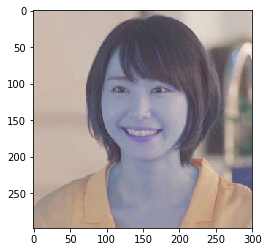

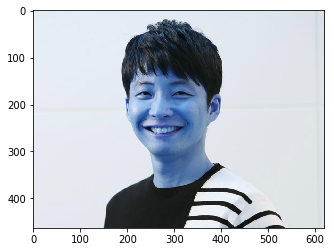

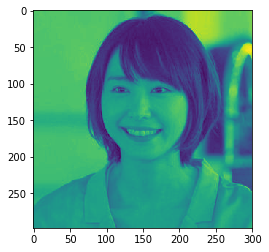

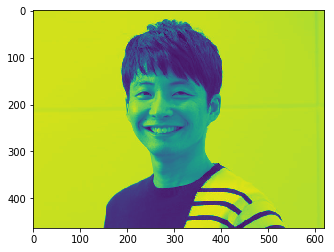

In [5]:
plot_img_list([img1, img2, img1_gray, img2_gray])

## 顔の切り出し

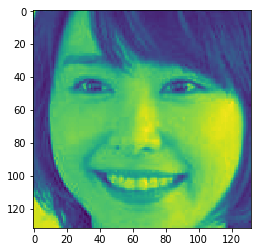

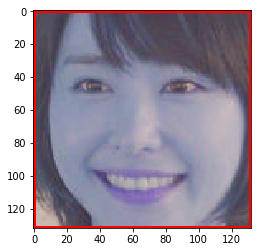

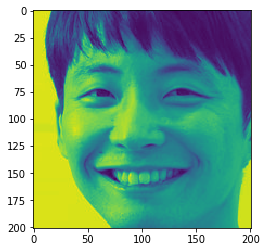

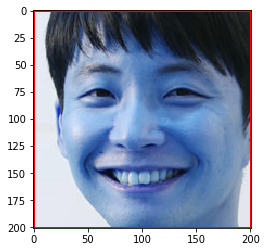

In [6]:
img1_faces = face_cascade.detectMultiScale(img1_gray, 1.3, 5)
for (x,y,w,h) in img1_faces:
    cv2.rectangle(img1,(x,y),(x+w,y+h),(255,0,0),2)
    img1_roi_gray = img1_gray[y:y+h, x:x+w]
    img1_roi_color = img1[y:y+h, x:x+w]
plot_img_list([img1_roi_gray, img1_roi_color])

img2_faces = face_cascade.detectMultiScale(img2_gray, 1.3, 5)
for (x,y,w,h) in img2_faces:
    cv2.rectangle(img2,(x,y),(x+w,y+h),(255,0,0),2)
    img2_roi_gray = img2_gray[y:y+h, x:x+w]
    img2_roi_color = img2[y:y+h, x:x+w]
plot_img_list([img2_roi_gray, img2_roi_color])
# print(img2_faces)

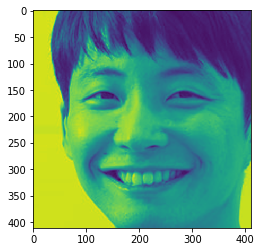

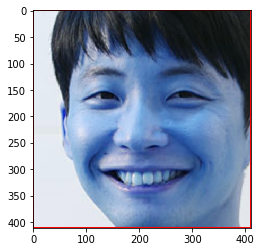

In [8]:
img2 = cv2.imread(img2_path)
height, width = img2.shape[:2]
img2 = cv2.resize(img2,(2*width, 2*height), interpolation = cv2.INTER_CUBIC)
# plot_img_list([res])
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
img2_faces = face_cascade.detectMultiScale(img2_gray, 1.1, 2)
for (x,y,w,h) in img2_faces:
    cv2.rectangle(img2,(x,y),(x+w,y+h),(255,0,0),2)
    img2_roi_gray = img2_gray[y:y+h, x:x+w]
    img2_roi_color = img2[y:y+h, x:x+w]
plot_img_list([img2_roi_gray, img2_roi_color])